# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

### Name: Victor Olufemi.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv
data = pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
# Describe our data for each feature and use .info() for get information about our dataset.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Analyse missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

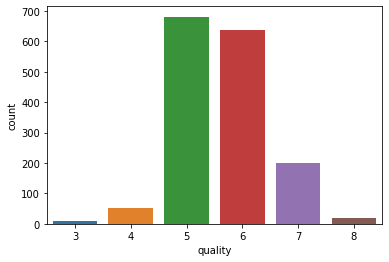

In [6]:
# Our label Distribution (countplot)
sns.countplot(x = "quality", data=data)

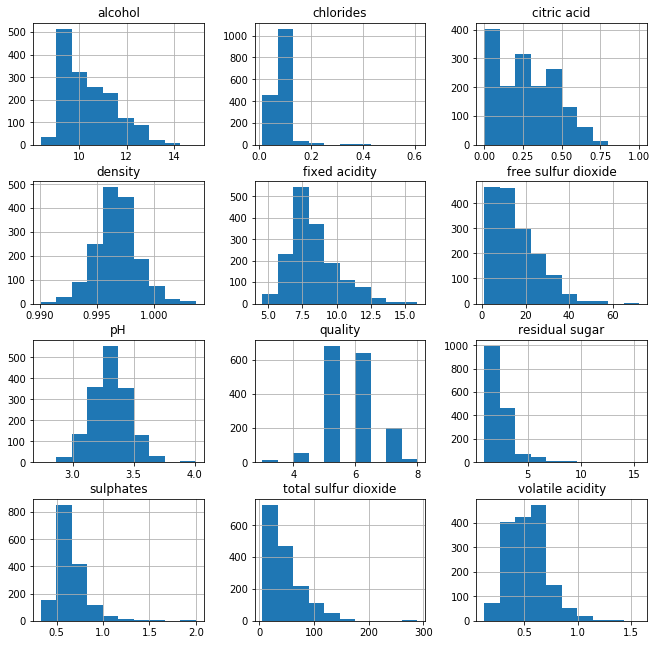

In [7]:
data.hist(figsize=(11,11))
plt.show()

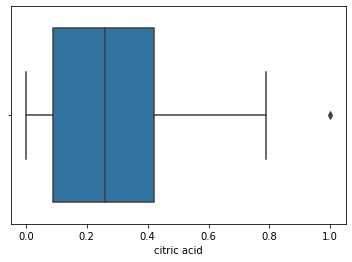

In [8]:
# sight some outliers
sns.boxplot(data["citric acid"])

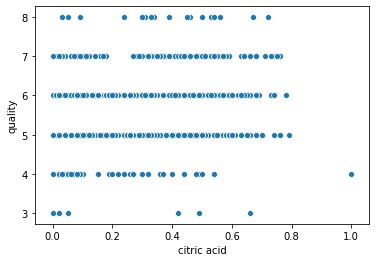

In [9]:
sns.scatterplot(x="citric acid", y="quality", data=data)

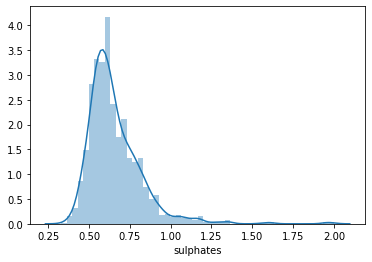

In [10]:
# Example EDA (distplot)
sns.distplot(data["sulphates"])

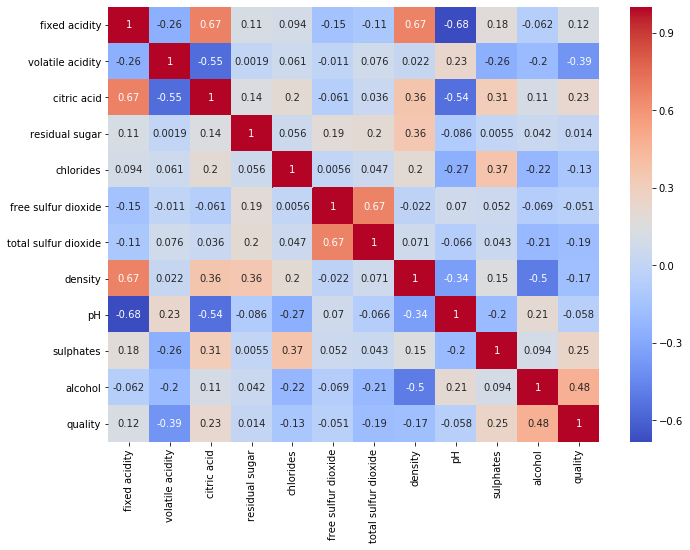

In [11]:
figure, axis = plt.subplots(figsize = (11,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

###### Checking for duplicate columns

In [12]:
duplicateRowsDF = data[data.duplicated(keep='first')]
print("There are {} duplicate rows".format(len(duplicateRowsDF)))
duplicateRowsDF.head()

There are 240 duplicate rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


###### Remove dupliate rows

In [13]:
# dropping duplicate values 
data.drop_duplicates(keep='first',inplace=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###### Handling Outliers as detected via boxplots

In [14]:
from scipy import stats
data_no_label = data.drop("quality",axis=1)
z_scores = stats.zscore(data_no_label)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [15]:
print(len(data),"rows currently")
data.quality.value_counts()

1239 rows currently


5    525
6    491
7    154
4     47
8     15
3      7
Name: quality, dtype: int64

###### Split data into train and test set into 70 - 30

In [16]:
quality = data.quality
data = data.drop("quality",axis=1)

In [17]:
from sklearn.model_selection import train_test_split, cross_validate
x_train, x_test,y_train,y_test = train_test_split(data, quality, test_size = 0.3)

Feature Scaling Algorithms that use gradient descent require feature scaling while tree based models do not. I'll be using tree based models, which do not require feature scaling.

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

###### Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def evaluate_model(classifier):
    pred = classifier.predict(x_test)
    cv = cross_validate(classifier,x_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
    train_pred = classifier.predict(x_train)
    cm = confusion_matrix(y_test, pred)
    cr = classification_report(y_test, pred)
    train_score = (np.mean(cv['test_score']))
    score = (cv["estimator"][0].score(x_test,y_test))
    
    # print evaluations
    

    print("theaverage train score is ",train_score)
    print("the model accuracy score is ",score)
    print("\n The confusion Matrix")
    print(cm,"\n")
    print(cr)
    #Feature Importance
    plt.figure(figsize=(12, 8))
    importance = classifier.feature_importances_
    sns.barplot(x=importance, y=data.columns)
    plt.show()

###### using Random Forest Classifier

theaverage train score is  0.6089965397923875
the model accuracy score is  0.6102150537634409

 The confusion Matrix
[[  0   0   0   0   0   0]
 [  1   0  14   6   1   0]
 [  0   0 111  47   0   0]
 [  0   0  38  95   8   0]
 [  0   0   5  29  12   0]
 [  0   0   0   1   4   0]] 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        22
           5       0.66      0.70      0.68       158
           6       0.53      0.67      0.60       141
           7       0.48      0.26      0.34        46
           8       0.00      0.00      0.00         5

    accuracy                           0.59       372
   macro avg       0.28      0.27      0.27       372
weighted avg       0.54      0.59      0.56       372



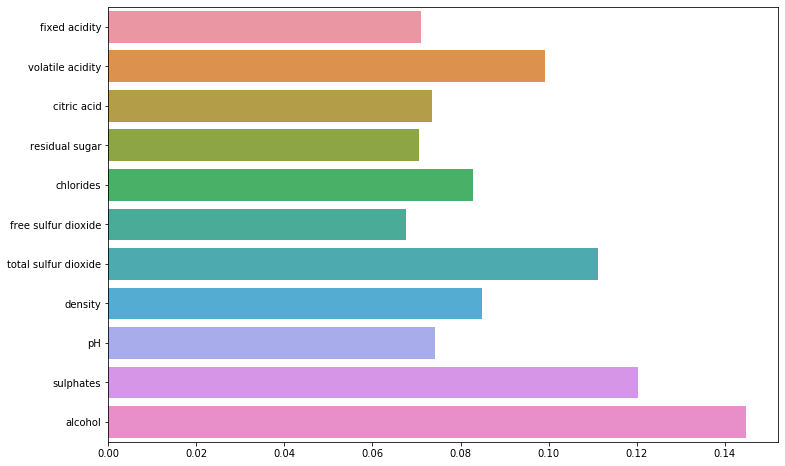

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 1000,n_jobs=-1, random_state=2020)
classifier1.fit(x_train, y_train)
#Evaluate Random Forest Classifier
evaluate_model(classifier1)

###### Using Decision Tree Classifier

theaverage train score is  0.566320645905421
the model accuracy score is  0.5134408602150538

 The confusion Matrix
[[  0  12  10   0   0]
 [  0  85  73   0   0]
 [  0  34 101   6   0]
 [  0   3  34   9   0]
 [  0   0   2   3   0]] 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        22
           5       0.63      0.54      0.58       158
           6       0.46      0.72      0.56       141
           7       0.50      0.20      0.28        46
           8       0.00      0.00      0.00         5

    accuracy                           0.52       372
   macro avg       0.32      0.29      0.28       372
weighted avg       0.51      0.52      0.49       372



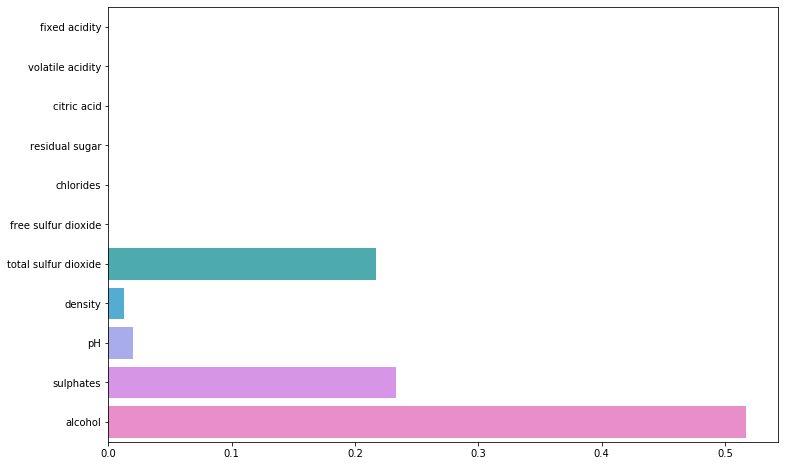

In [20]:
from sklearn.tree import DecisionTreeClassifier

classifier2 = DecisionTreeClassifier(max_depth=4)
classifier2.fit(x_train,y_train)
evaluate_model(classifier2)

###### Using Adaboost Ensemble From Scikit Learn

theaverage train score is  0.510957324106113
the model accuracy score is  0.5241935483870968

 The confusion Matrix
[[ 0  0  0  0  0  0]
 [ 0  0 11 10  1  0]
 [ 1  0 91 50 16  0]
 [ 0  0 35 67 39  0]
 [ 0  0  2 21 23  0]
 [ 0  0  0  1  4  0]] 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        22
           5       0.65      0.58      0.61       158
           6       0.45      0.48      0.46       141
           7       0.28      0.50      0.36        46
           8       0.00      0.00      0.00         5

    accuracy                           0.49       372
   macro avg       0.23      0.26      0.24       372
weighted avg       0.48      0.49      0.48       372



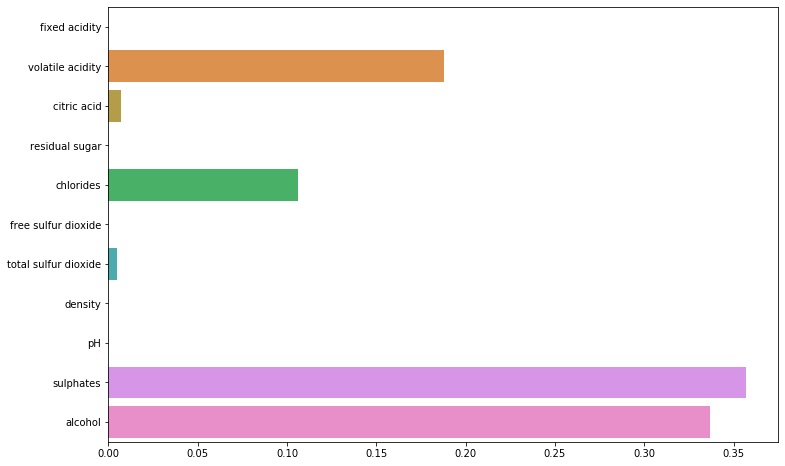

In [21]:
from sklearn.ensemble import AdaBoostClassifier
classifier3 = AdaBoostClassifier(learning_rate = 0.01,n_estimators=1000)
classifier3.fit(x_train, y_train)
evaluate_model(classifier3)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

###### Conclusion
The best model thus far is the Random Forest model with the highest accuracy score, recall, precision and F1 score. From the model's feature of importance, we see how it clearly utilizes each feature given in the dataset far better than other algorithms. 
The random Forest Classifier also had the best Cross-Validated score which confirms that we are not overfitting as the variance is about 0.01.

###### Random Forests Results

theaverage train score is  0.6089965397923875
the model accuracy score is  0.6102150537634409

 The confusion Matrix
[[  0   0   0   0   0   0]
 [  1   0  14   6   1   0]
 [  0   0 111  47   0   0]
 [  0   0  38  95   8   0]
 [  0   0   5  29  12   0]
 [  0   0   0   1   4   0]] 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        22
           5       0.66      0.70      0.68       158
           6       0.53      0.67      0.60       141
           7       0.48      0.26      0.34        46
           8       0.00      0.00      0.00         5

    accuracy                           0.59       372
   macro avg       0.28      0.27      0.27       372
weighted avg       0.54      0.59      0.56       372



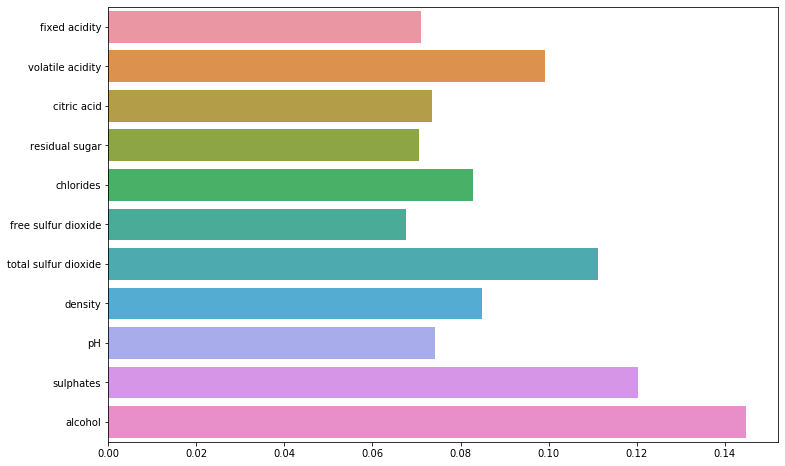

In [22]:
evaluate_model(classifier1)

###### Model Improvements

1. We can use ensemble methods such as Catboost, XGboost and LightGBM, which are state of the art boosting algorithms.
2. Stacking the Random Forest Classifier with other Classifiers doing relatively well
3. Voting method from several algorithms could be used


The End.